### Importando os pacotes

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Alguns dos valores iniciais

In [61]:
ticket_medio_inicial = 100
ticket_medio_sequencia = 200

recompra_inicial = 0.2

cac=150

### Gerando o banco de dados
Simulamos 100 observações que possuem o valor do ticket médio com a média de 100 reais e o desvio padrão de 10 reais

In [62]:
# Criando dataframe
dados_vendas = np.round(np.random.normal(loc=ticket_medio_inicial, scale=10, size=100),2)


dados_vendas= pd.DataFrame(dados_vendas, columns=['mes_0'])

dados_vendas['lucro_0'] = dados_vendas['mes_0'] * 0.3

#### Observando a média e o desvio padrão do valor adquirido e do lucro do mês 0
lucro = 30% do valor adquirido

In [76]:
print("média", dados_vendas['mes_0'].mean())

print("desvio padrão", dados_vendas['mes_0'].std())

média 99.73710000000003
desvio padrão 9.926455651846776


#### Criando variável categórica de dados de recompra do primeiro mês, com 20% de chance de recompra

In [64]:
dados_vendas['recompra_1'] = np.where(np.random.rand(len(dados_vendas)) < recompra_inicial, 'sim', 'não')
dados_vendas['recompra_1'].value_counts()

recompra_1
não    86
sim    14
Name: count, dtype: int64

### Criando os dados do mês 1
para o mês 1, nós selecionamos quais clientes fizeram a recompra e simulamos o valor com média de 200 reais e desvio padrão de 10 reais

In [65]:
dados_vendas['mes_1'] = np.where(dados_vendas['recompra_1'] == 'sim',
                                    np.round(np.random.normal(loc=ticket_medio_sequencia, scale=10, size=len(dados_vendas)), 2),
                                    0)

#### lucro = 30% do valor adquirido

In [66]:
dados_vendas['lucro_1'] = dados_vendas['mes_1'] * 0.3

### Criando dos meses 2 ao 48

In [70]:
for mes in range(2, 49):
    # Calcula a probabilidade de recompra de forma decrescente até o 10º mês
    if mes <= 10:
        # Calculo de progressão da retenção do usuário do mês 2 ao 10
        probabilidade_recompra = np.round(0.2 - ((mes - 2) * 0.15 / 8), 2)
    else:
        probabilidade_recompra = 0.05
    

    dados_vendas[f'probabilidade_{mes}'] = probabilidade_recompra
    
    dados_vendas[f'recompra_{mes}'] = np.where(np.random.rand(len(dados_vendas)) < probabilidade_recompra, 'sim', 'não')
    
    dados_vendas[f'mes_{mes}'] = np.where(dados_vendas[f'recompra_{mes}'] == 'sim',
                                          np.round(np.random.normal(loc=ticket_medio_sequencia, scale=10, size=len(dados_vendas)), 2),
                                          0)
    dados_vendas[f'lucro_{mes}'] = dados_vendas[f'mes_{mes}'] * 0.3

### Criando um dataframe com os valores do Lucro mês a mês e do Lucro acumulado durante os meses

In [68]:
cac_total = dados_vendas.shape[0]*cac
lucro_acumulado_total = 0

lucro_acumulado=[]


for mes in range(0,49):
    
    lucro_mes = dados_vendas[f'lucro_{mes}'].sum()
    lucro_acumulado_total +=lucro_mes
    lucro_acumulado.append({'mes':f'{mes}', 'lucro_mes': lucro_mes, 'lucro_acumulado': lucro_acumulado_total})
    
    # Lucro acumulado até 15000 reais(CAC acumulado)
    if lucro_acumulado_total >= cac_total:
        break


lucro_acumulado=pd.DataFrame(lucro_acumulado)


lucro_acumulado['lucro_mes'].sum()

15015.944999999998

In [69]:
lucro_acumulado

,mes,lucro_mes,lucro_acumulado
0,0,2992.113,2992.113
1,1,853.404,3845.517
2,2,1379.082,5224.599
3,3,909.006,6133.605
4,4,772.260,6905.865
5,5,601.692,7507.557
6,6,884.511,8392.068
7,7,675.051,9067.119
8,8,595.308,9662.427
9,9,523.953,10186.380


### Gráfico 1 - Distribuição dos lucros pelos meses

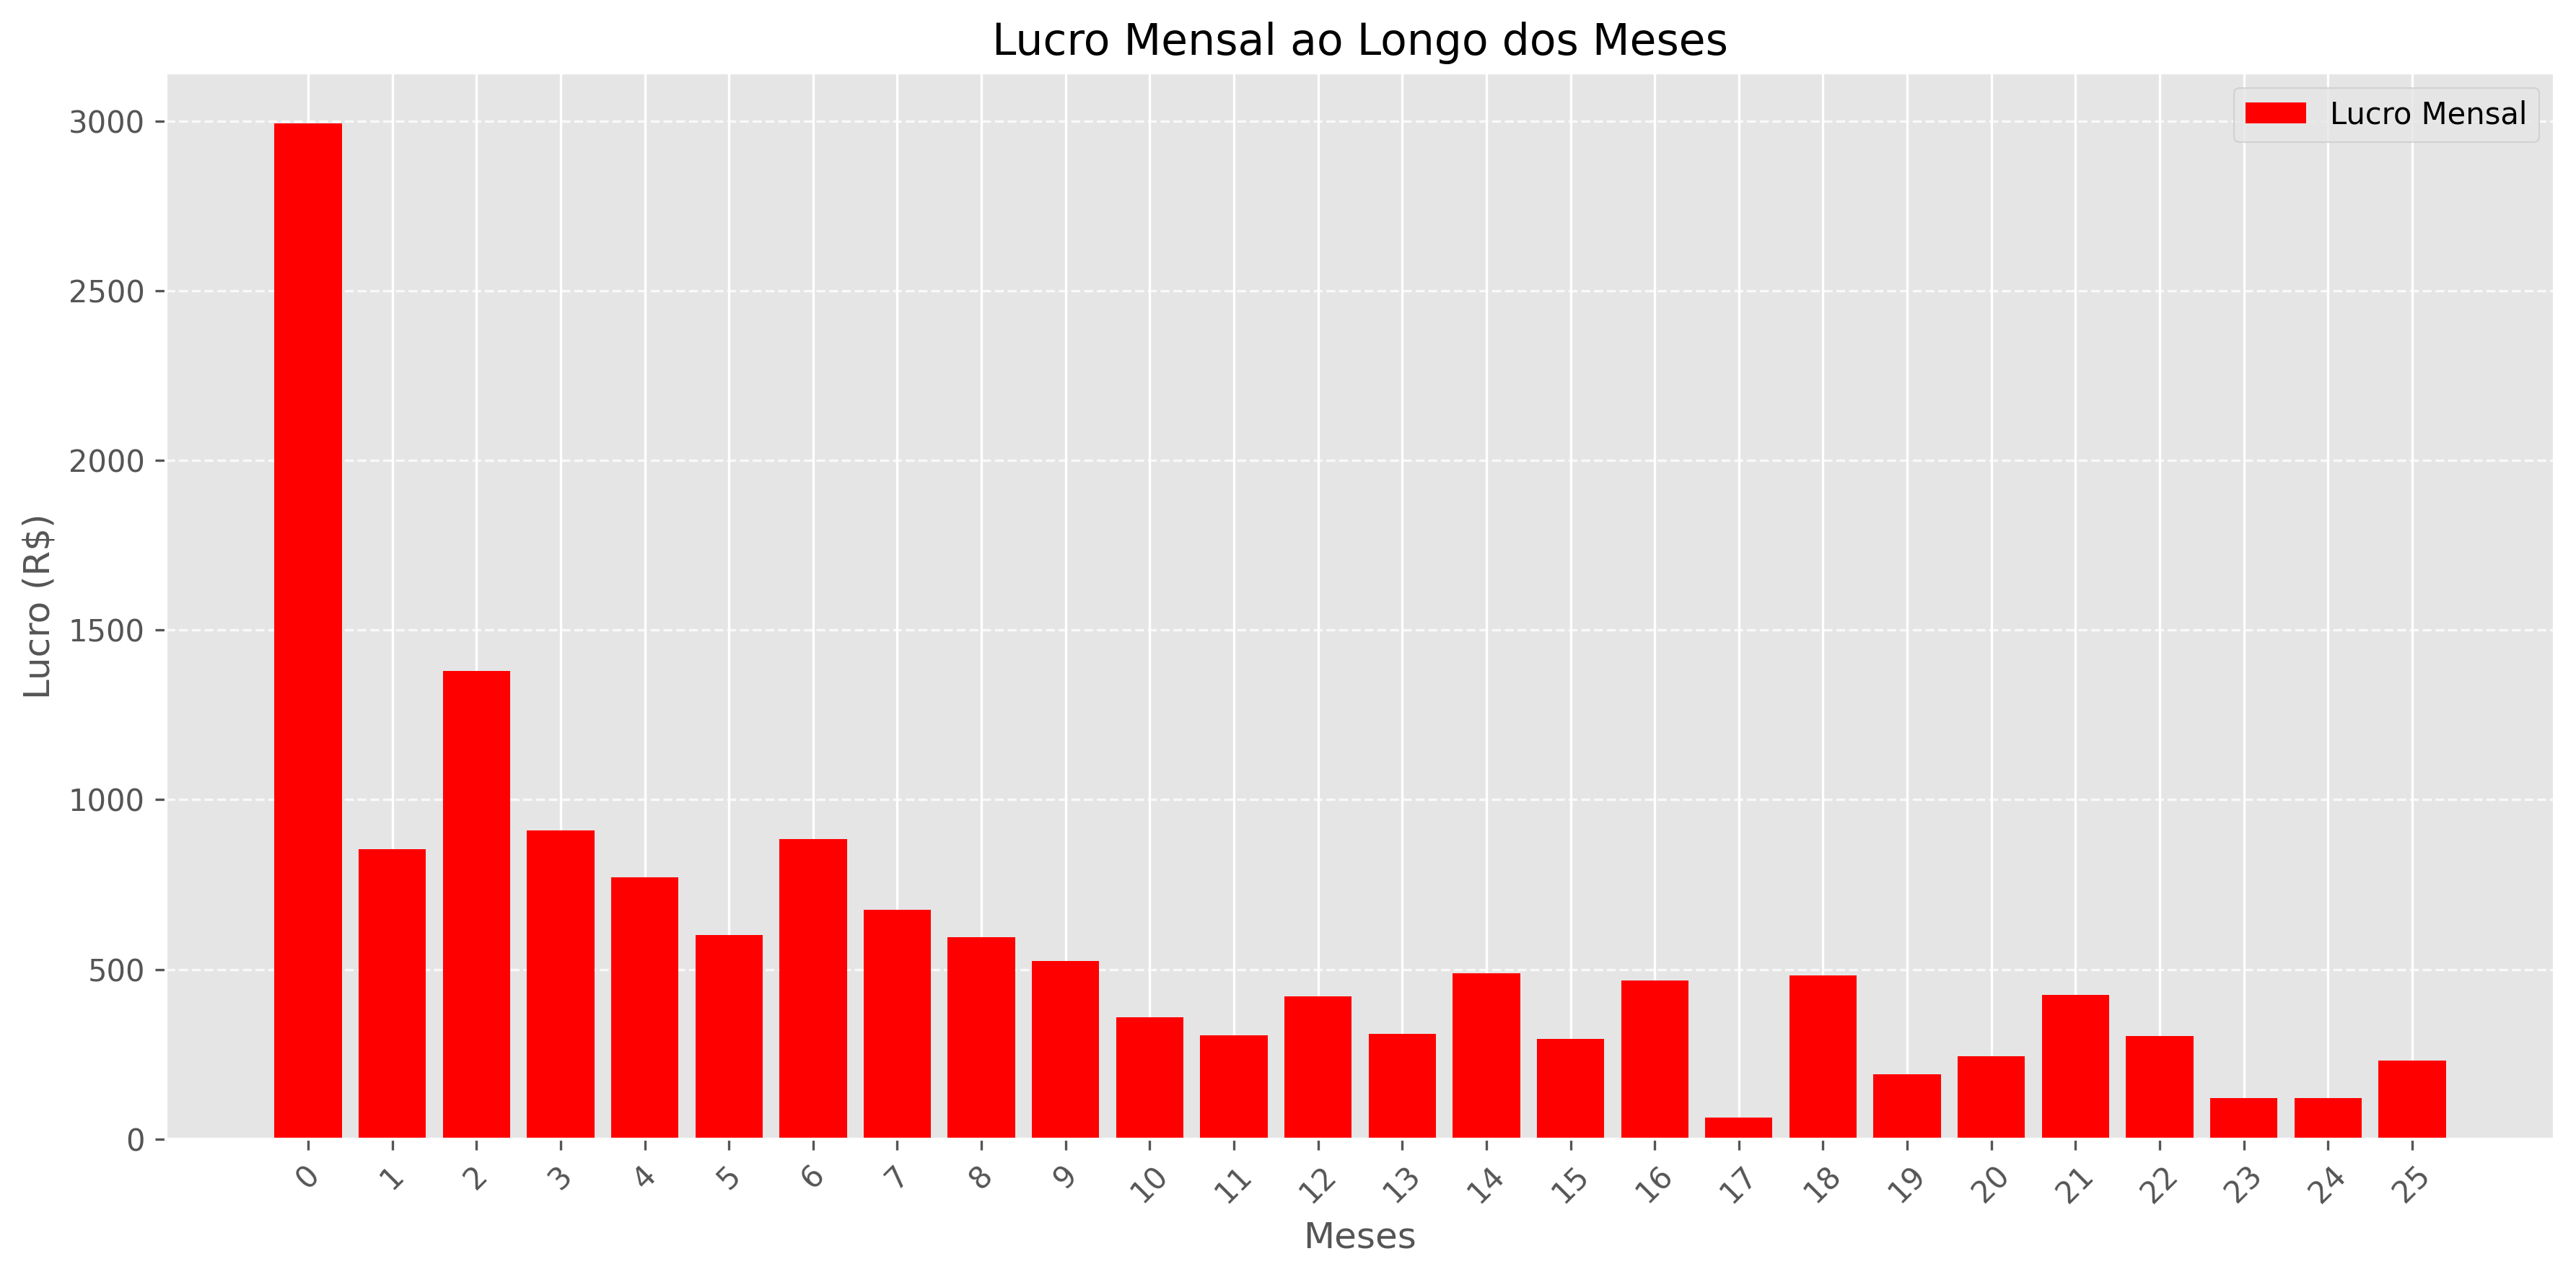

In [71]:
plt.figure(figsize=(12, 6), dpi=300)
#plt.plot(lucro_acumulado['mes'], lucro_acumulado['lucro_mes'], marker='o', color='red', label='Lucro Mensal')
plt.style.use('ggplot') 
plt.bar(lucro_acumulado['mes'], lucro_acumulado['lucro_mes'], color='red', label='Lucro Mensal')

plt.title('Lucro Mensal ao Longo dos Meses')
plt.xlabel('Meses')
plt.ylabel('Lucro (R$)')
plt.grid(axis='y', linestyle='--', alpha=0.8) 
plt.legend()
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor visualização

plt.tight_layout()
plt.show()

### Gráfico 2 - Lucro acumulado durante os meses

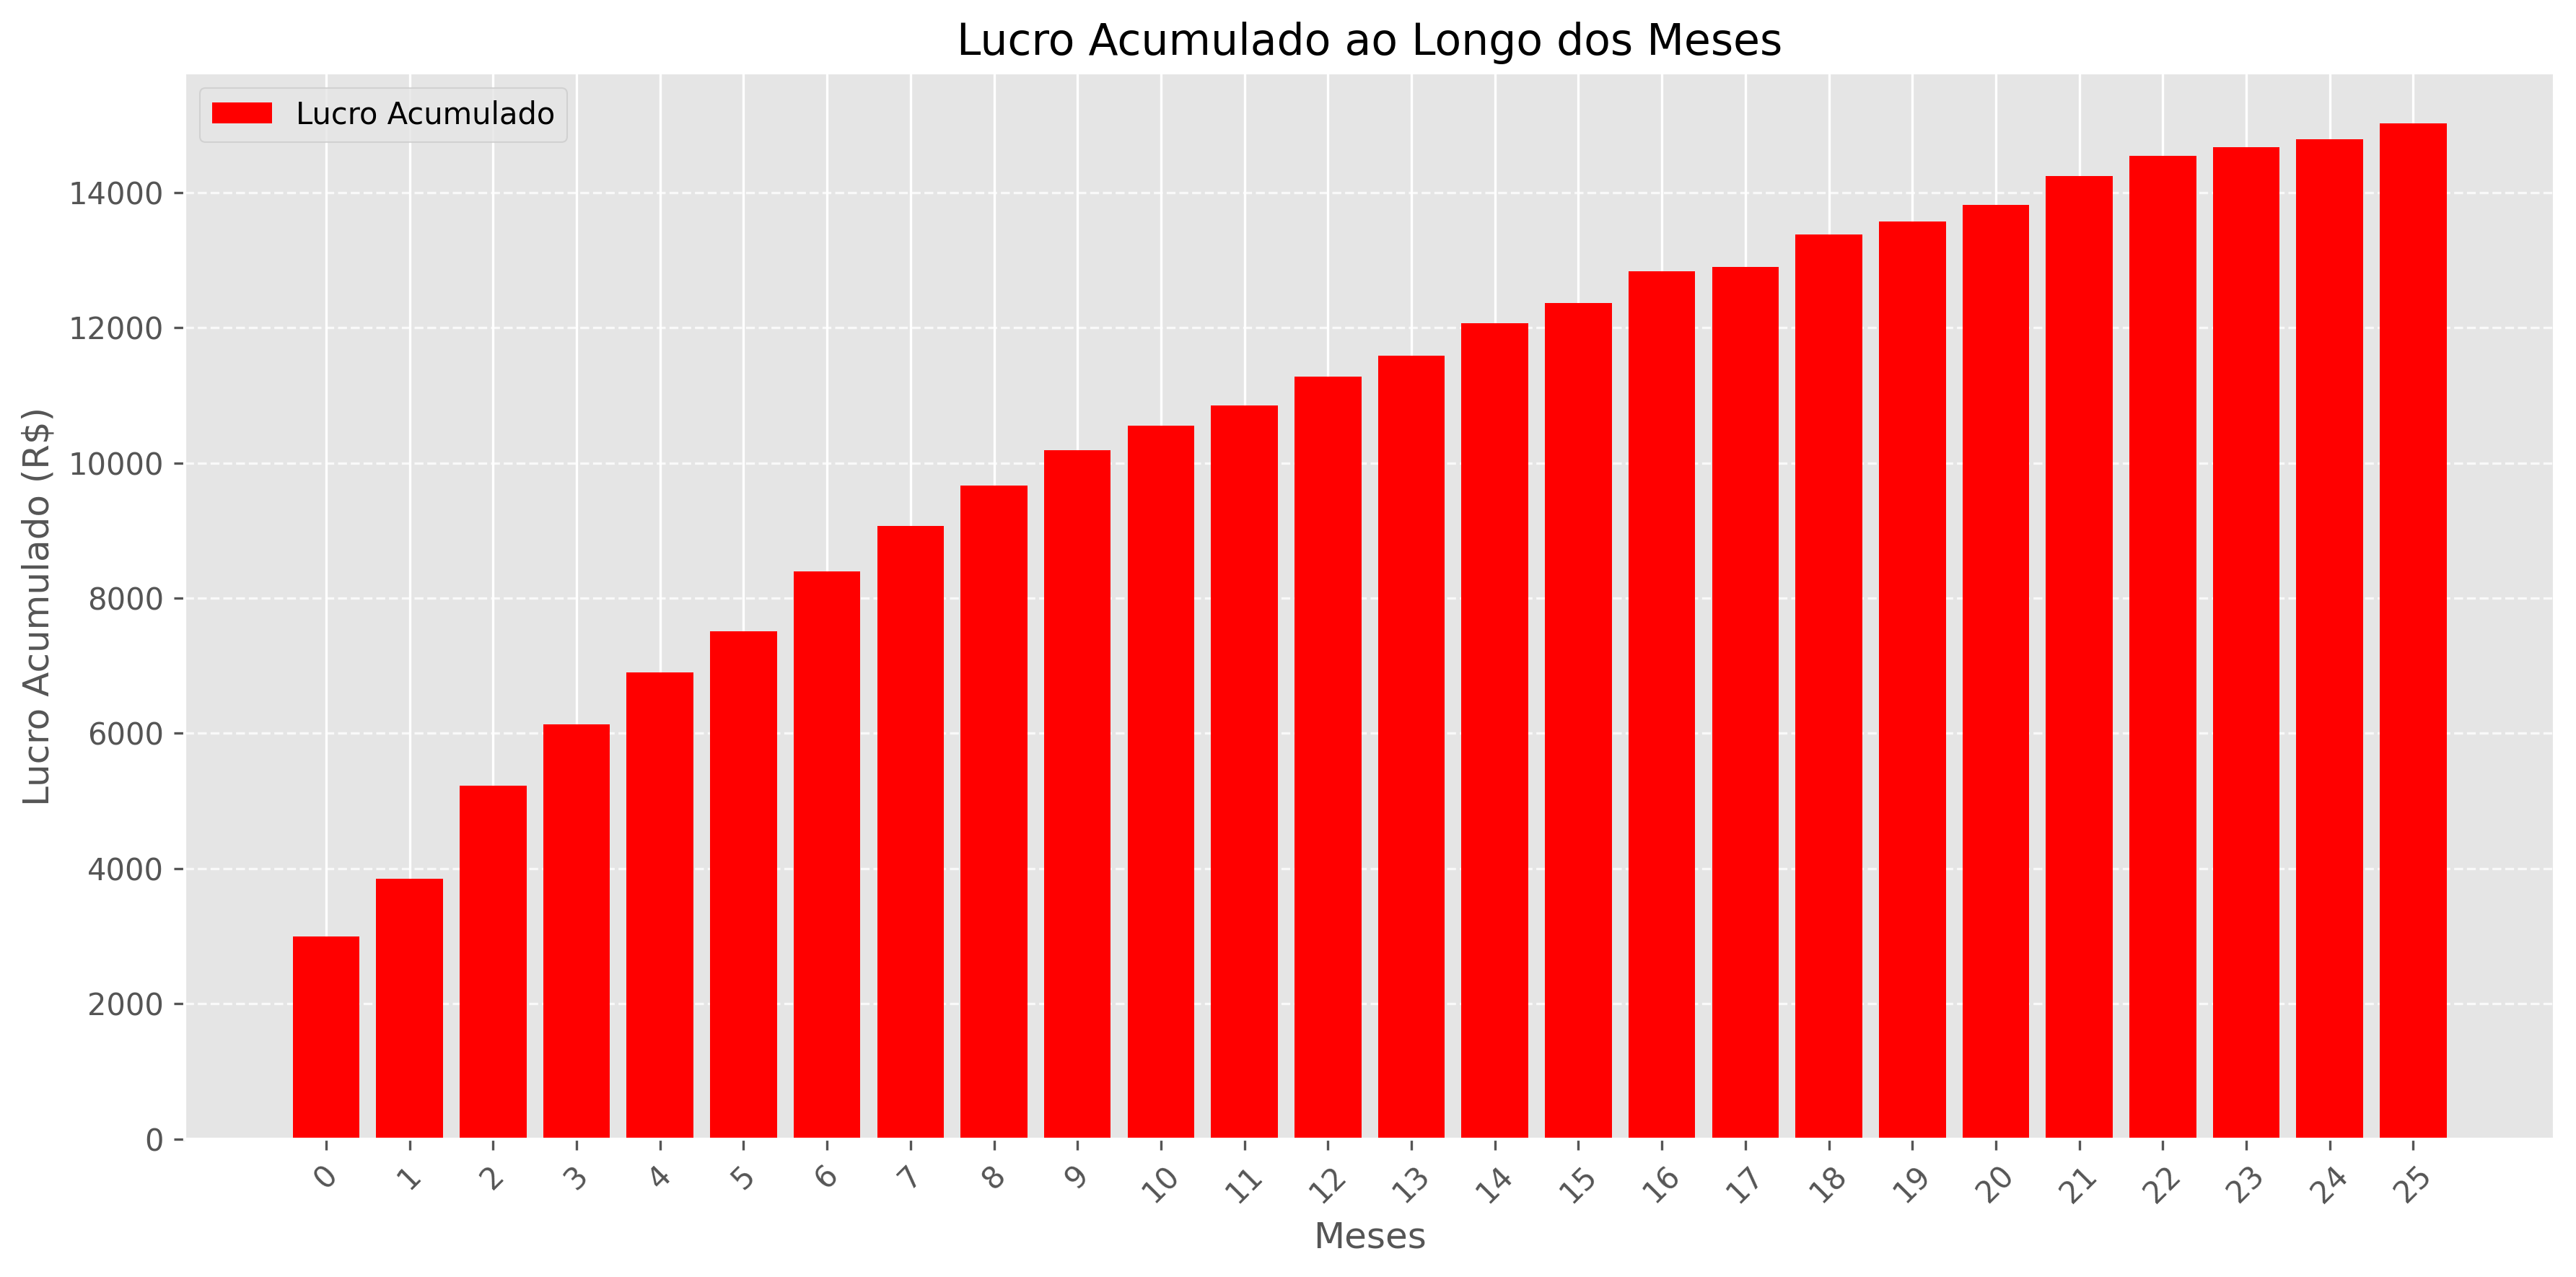

In [72]:
plt.figure(figsize=(12, 6), dpi=300)
plt.style.use('ggplot') 
plt.bar(lucro_acumulado['mes'], lucro_acumulado['lucro_acumulado'], color='red', label='Lucro Acumulado')

# Configurações do gráfico
plt.title('Lucro Acumulado ao Longo dos Meses')
plt.xlabel('Meses')
plt.ylabel('Lucro Acumulado (R$)')
plt.grid(axis='y', linestyle='--', alpha=0.8)  # Linhas de grade horizontais para facilitar a leitura
plt.legend()
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor visualização

# Exibe o gráfico
plt.tight_layout()
plt.show()
